<a href="https://colab.research.google.com/github/cdmafAdi/DL_NOTES-/blob/main/chp_1_Neural_network_intro/29_weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("x,y,class.csv")
df.head()

,x1,x2,label
0,0.0,0.0,0
1,0.5,0.5,0
2,1.0,0.0,0
3,1.5,0.5,0
4,2.0,0.0,0


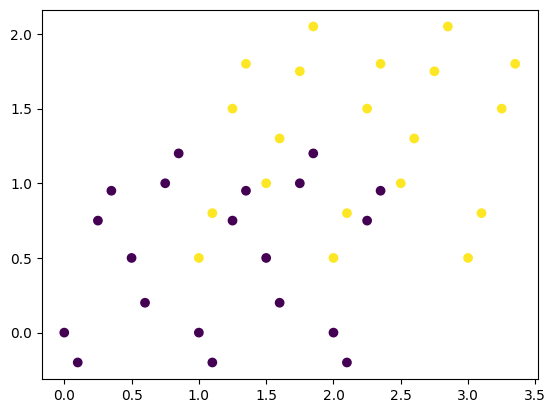

In [10]:
plt.scatter(df['x1'],df['x2'],c=df['label'])

In [11]:
x = df.iloc[:,0:2].values
y = df.iloc[:, -1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.get_weights()

[array([[-0.50687516, -0.56533706, -0.3236261 , -0.25090525, -0.1874727 ,
         -0.3114694 , -0.3088209 ,  0.19335628,  0.34367007,  0.6452252 ],
        [-0.22363827, -0.28696424,  0.5415229 , -0.69955677, -0.5234232 ,
          0.4560842 , -0.6732585 ,  0.29696637, -0.08852506, -0.29150057]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5528425 ],
        [ 0.4609291 ],
        [-0.1326316 ],
        [-0.22297263],
        [ 0.34669405],
        [ 0.6871607 ],
        [-0.17849332],
        [ 0.3877918 ],
        [-0.16800773],
        [ 0.01240933]], dtype=float32),
 array([0.], dtype=float32)]

now lets nitialize all weights to zero


In [17]:
initial_weights = model.get_weights()

In [18]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(x,y,epochs = 100, validation_split = 0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6962
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6250 - loss: 0.6924 - val_accuracy: 0.0000e+00 - val_loss: 0.6992
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6250 - loss: 0.6917 - val_accuracy: 0.0000e+00 - val_loss: 0.7022
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6250 - loss: 0.6909 - val_accuracy: 0.0000e+00 - val_loss: 0.7052
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6250 - loss: 0.6902 - val_accuracy: 0.0000e+00 - val_loss: 0.7082
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6250 - loss: 0.6895 - val_accuracy: 0.0000e+00 - val_loss: 0.7112
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6250 - loss: 0.6888 - val_accuracy: 0.0000e+00 - val_loss: 0.7142
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6250 - loss: 0.6881 - val_

In [26]:
model.get_weights()

[array([[-0.13840732, -0.13840732, -0.13840732, -0.13840732, -0.13840732,
         -0.13840732, -0.13840732, -0.13840732, -0.13840732, -0.13840732],
        [-0.13539399, -0.13539399, -0.13539399, -0.13539399, -0.13539399,
         -0.13539399, -0.13539399, -0.13539399, -0.13539399, -0.13539399]],
       dtype=float32),
 array([0.11133748, 0.11133748, 0.11133748, 0.11133748, 0.11133748,
        0.11133748, 0.11133748, 0.11133748, 0.11133748, 0.11133748],
       dtype=float32),
 array([[-0.07936776],
        [-0.07936776],
        [-0.07936776],
        [-0.07936776],
        [-0.07936776],
        [-0.07936776],
        [-0.07936776],
        [-0.07936776],
        [-0.07936776],
        [-0.07936776]], dtype=float32),
 array([-0.07315136], dtype=float32)]

In [28]:
import mlxtend

In [36]:
from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(x,y.astype('int',y=y.astype(int),clf=model,legend=2))

the below plot show the absolute wrong decission boundaries this happened due to initialzing all weights to zero

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

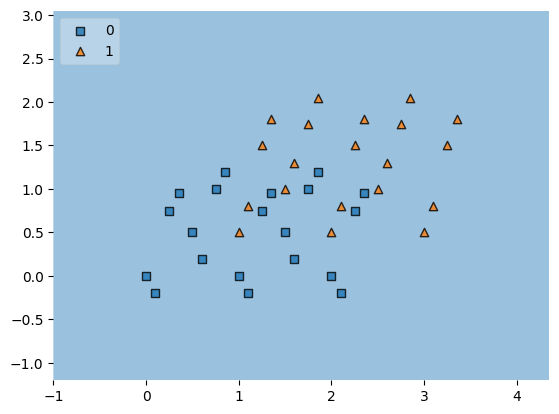

In [35]:
plot_decision_regions(X=x, y=y.astype(int), clf=model, legend=2)
